# Assignment 4: EEG and Event-Related Potentials
Please submit this assignment to Canvas as a jupyter notebook (.ipynb).  The assignment will get you working with EEG brain data, completing several analyses on event-related potentials.

In [2]:
# imports
import cmlreaders as cml
import numpy as np
import matplotlib.pyplot as plt
import os
from ptsa_plot.ptsa_plot.topo import topoplot
import pandas as pd
from scipy.stats import ttest_rel


KeyboardInterrupt



## Assignment Overview
In this assignment you will carry out basic time-series analyses of electroencephalographic
(EEG) data. Specifically, you will measure event-related potentials (ERPs) associated with item
encoding events in a free recall experiment. For background on the ERP method please review
Chapter 3 of EHM.

In the previous assignment you learned the basics of working with EEG data
and generating ERPs for a single subject. Now you will generate ERPs across subjects,
calculate statistical significance, and investigate the distribution of ERP voltage across the scalp.

As you'll soon figure out, the process of dealing with large data sets can be quite challenging. Just loading large amounts of data can take a long time. In future assignments, the computations you will have to perform over the data will take so long to compute with a single processor (which is what happens when you compute on the Jupyter node) that you will need to access multiple cores on the cluster for computing your analysis jobs in parallel, which we will cover in a future lecture.

To help deal with the scale of the data sets, there are several recommended strategies to take. Loading the behavioral data and EEG over the whole data set will be slow, so start early and make lots of checkpoints (or save points). Specifically, here are some recommendations:

1. Have the mindset of testing all your code on subsets of the data and then once you've worked things out, testing on large subsets.  To perform initial debugging of errors, test with e.g., a single session from a single subject. To perform more meaningful correctness testing, test with 10 to 15 subjects for instance rather than all of them. This will give you enough data to start to see meaningful patterns emerge for the largest effects in the data but not take nearly as much time. Assume for heavier computations that you may only get to run your final analysis on all the data a small number of times before you run out of time and have to submit, so test your code in a time efficient manner! 

2. Another recommended strategy on this topic is thinking about creating optimized and reusable functions. Then you can debug that function once and reap benefits for the remainder of the assignment (or more generally, yours and other's lives). For many problems, you'll write code to perform some task. Then in subsequent problems, you'll be assigned largely similar tasks.  For these subsequent problems, avoid the temptation to copy and paste large blocks of code that are 99% the same. Put the original code in a function and add flags to indicate that e.g., you now want to use a different variant of the function with a conditional statement internal to the function rather than creating a whole new function. This will make your code much easier to read, maintain, and debug going forward.

3. Save intermediate results (e.g., computed ERPs for each subject) as e.g. pickle files (see the pickle library in Python for how to save and load these files, which can store most Python objects) or as .npy (numpy) files for raw array data (less recommended). This way if (and when) you have to restart your kernel you can load up those results without having to reload all the data and recompute the same results. Do not save all the EEG data to your local directory, only intermediate and final analysis results.

4. Save final results, such as matplotlib figures (which seaborn uses under the hood), as PDF and PNG files with either fig.savefig() or plt.savefig(), or again with the Python pickle module for other results.

In [ ]:
exp = 'ltpFR2'                      # LTPFR2 experiment
df = cml.get_data_index('ltp')
df = df.query("experiment == @exp")     # select only LTPFR2 sessions
df

### Question 1
Let's extend the ERP analyses of serial positions from the previous assignment to a larger group of subjects. 

1) Create the same ERP's as in question 5 averaged across subjects.
2) Compare the group average to the individual subject ERP analysis in the previous exercise.

For the following analyses:
* Use subjects with subject IDs between LTP093 and LTP330 (inclusive; not every number in that range is assigned to a subject) which have all 24 sessions available. 
* Exclude the 24th session (session numbers are zero-indexed, i.e., they count from zero to 23 so exclude sessions with session number 23) from these analyses since a different version of the experiment was run in that session. 
* Some subjects have artifactual recordings with much higher signal variance than others. These subjects need to be excluded from your analyses. Exclude subjects with maximum ERP values above 0.00005 V (the scalp EEG recordings are measured in volts).
* Some subjects will have different sample rates for different sessions. When you attempt to average/concatenate over the time series or ERPs for these sessions with different sample rates, an error will be thrown for shape misalignment. You can try resampling the EEG with 

    `sess_eeg = sess_eeg.resampled(sample_rate) where sess_eeg is a PTSA.TimeSeries with EEG`

    You'll ultimately want to make sure that each of the EEG traces/ERPs you're averaging/concatenating has the same length and set of time values. As long as the time series lengths after resampling are the same, you can just directly set the time values in the PTSA array to be the same, e.g., with

    `sess_eeg['time'] = time`

    where `time` is the most common set of time values for the EEG traces, i.e., running from -200 ms to 1000 ms in increments to 2 ms (500 Hz sampling rate). You can exclude sessions that don't align in time after resampling.
* Finally, and critically, it's recommended that you save out your resulting ERPs (e.g., to a pickle file; see the Python pickle module, which provides for saving and reloading arbitrary Python data types). These ERPs can take a decent amount of time to compute, and you'll be using these ERPs many times in the remainder of the assignment. Remember that your Jupyter kernel can periodically die and that you'll often reach error states that require restarting your notebook kernel. Saving out your results and then reloading them for subsequent problems is expected to make completing this assignment much faster in the long run!

## Inferential Statistics on and Topography of ERPs

### Question 1

1) Compute 95% confidence bands separately for each time point of each ERP. Plot the ERPs with the time-varying confidence intervals. 
    * Recall that the 95% confidence interval is 1.96 * standard error of the mean, where the standard error is defined as: 
    $$
    SE = \frac{\sigma}{\sqrt{n}}
    $$
    where $\sigma$ is the sample standard deviation and $n$ is the number of independent observations (here we should treat subjects as independent).

2) Do the confidence bands exclude zero at any points? Which ones? Are there points where they do not overlap? What is the statistical interpretation of these confidence intervals?

In [9]:
# Question 6.1
### YOUR CODE HERE

Question 6.2

**YOUR CODE HERE**

### Question 7
1) For each subject, compute the difference between the ERPs for serial position 1 and for the average of serial positions 4-24 (i.e. ERP_1 minus ERP_4_24) and average the difference ERPs across subjects. Now compute the 95% confidence band around the difference waveform, and plot.
2) Does this exclude zero at any points? Do these results match those from the previous analysis? If not, explain the difference in the inference one can make from these confidence bands.

In [10]:
# Question 7.1
### YOUR CODE HERE

Question 7.2

**YOUR CODE HERE**

### Question 8
1) Compute an across-subject paired t-test (scipy.stats.ttest_rel), comparing at each time point the voltage of items in serial position 1 to the average of those in serial positions 4-24. Use a horizontal bar to indicate which time points exceed the criterion of p < 0.05 without correcting for multiple comparisons. 
2) How do these results match up with those in the previous two exercises?

In [11]:
# Question 8.1
### YOUR CODE HERE

Question 8.2

**YOUR ANSWER HERE**

### Question 9
1) Recompute the statistical significance of the difference between ERPs using the false-discovery rate (FDR) method described in Chapter 3 (specifically you may use the Benjamini and Hochberg correction method). Indicate the points with FDR-corrected p-values p < 0.05 using a bar of another color shifted above or below the first bar. 
2) Comment on the difference between the two methods. Which is more conservative and why?

In [12]:
# Question 9.1
### YOUR CODE HERE

Question 9.2

**YOUR ANSWER HERE**

### Question 10
1) In all of the previous exercises you computed each ERP at each time point separately. Here we will compute the ERP averaged over a time window of 300-800 ms post stimulus (resulting in a single averaged value across the entire time interval) using the same procedures as for a single time point (i.e., baseline correction, etc.) again comparing serial position 1 to the average of serial positions 4-24. For this interval-averaged ERP, compute the across-subjects paired t-test for electrode 75 (Oz) and report the t-value, the degrees of freedom, and the p-value (as in t(df) = xxx, p = 0.xx).
2) Repeat this analysis for the interval from 100-300 ms post-stimulus.

In [13]:
# Question 10.1
### YOUR CODE HERE

In [14]:
# Question 10.2
### YOUR CODE HERE

### Question 11
To visualize the ERP serial position effect across the entire scalp we will now repeat the preceding exercise at all electrodes and generate “head plots” (ptsa_plot.topoplot) showing the difference in voltage across all electrodes (red colors indicating positive values, i.e., serial position 1 > serial positions 4-24; blue colors indicating negative values). Below we give example code for using ptsa_plot.topoplot with arbitrary example values. Create two versions of this plot:

1) One where you mark all electrodes for which this difference is significant using a conventional t-test without correction for multiple comparison using a significance threshold of p < 0.05. 
2) For the second plot only mark those electrodes that survive a correction for multiple comparisons using the FDR method. 
3) Compare the differences between the corrected and uncorrected statistical tests here with those for individual time points which you calculated earlier.

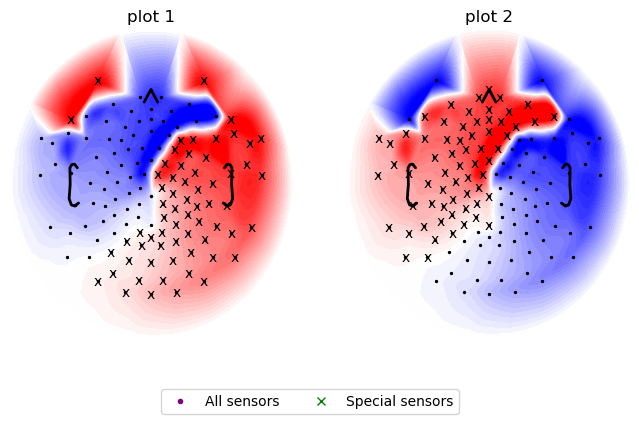

In [15]:
# example code for using ptsa_plot.topoplot
%matplotlib inline
%load_ext autoreload
%autoreload 2
# load channel plot coordinates
with open('./ptsa_plot/ptsa_plot/electrode_layouts/HCGSN128.dat', 'r') as sensorfile:
    angles, radii = sensorfile.readlines()
    sensors = (np.r_[np.array([float(a)
                               for a in angles.strip().split()]), 0],
               np.r_[[float(r) for r in radii.strip().split()], 0])

# examples channels for demonstration
n_channels = 128
channel_indices = np.arange(n_channels)

# just channels in our loaded EEG; use this for your actual plots
# channel_indices = np.array([np.int(c.values.tolist()[1:]) for c in list_eeg['channel']]) - 1 # keep this minus 1 for alignment
# n_channels = len(channel_indices)

cleaned_sensors = tuple(s[channel_indices] for s in sensors)

vmax = 0.6
vmin = -vmax

# create example values to plot
values = np.arange(n_channels) / n_channels * (vmax - vmin) + vmin

fig, axs = plt.subplots(1, 2, figsize=(8, 4))

# plot smoothed heat map of sensor values with sensors plotted as dots
topoplot(sensors=cleaned_sensors, values=values,
         axes=axs[0], cmap='bwr', sensor_props={'marker': '.'}, 
         vmin=vmin, vmax=vmax, levels=np.linspace(vmin, vmax, 50),
         labels=np.array(['x'  if v > np.mean(values) else ' ' for v in values]))
axs[0].set_title('plot 1')

# another example plot
topoplot(sensors=cleaned_sensors, values=-values,
         axes=axs[1], cmap='bwr', sensor_props={'marker': '.'}, 
         vmin=vmin, vmax=vmax, levels=np.linspace(vmin, vmax, 50),
         labels=np.array(['x'  if v < np.mean(values) else ' ' for v in values]))
axs[1].set_title('plot 2')

#### Add legend to the plots
marker_dot = plt.plot([], marker=".", ls="", color="purple")[0]
marker_x = plt.plot([], marker="x", ls="", color="green")[0]

fig.legend([marker_dot, marker_x], 
           ['All sensors', 'Special sensors'],
           loc='center', bbox_to_anchor=(0.5, -0.05), ncol=2)

In [16]:
# Question 11.1
### YOUR CODE HERE

In [17]:
# Question 11.2
### YOUR CODE HERE

Question 11.3

**YOUR ANSWER HERE**